# Exploración inicial dataset S10

Esta exploración inicial será sobre el dataset principal que engloba todos los partidos competitivos de las ligas domesticas durante la temporada 10 de League of legends

## Librerias

In [483]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys

## Carga de datos

In [484]:
S10_dataset = pd.read_csv("C:\\Users\\camil\\Downloads\\The Bridge\\08_19_2020.csv", sep =";")

## Exploración inicial

In [485]:
S10_dataset.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,03/01/2020 7:33,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,03/01/2020 9:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,03/01/2020 10:05,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,03/01/2020 10:57,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,04/01/2020 5:33,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


In [486]:
S10_dataset.tail()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
5144,1310259,EM,NaN,0,18/08/2020 20:25,1,10.16,2075,Racoon,Caitlyn,...,12.0,8.0,4.0,6.9976,3613.0,4564.0,83.0,5159.0,6917.0,127.0
5145,1310260,EM,NaN,0,18/08/2020 20:27,1,10.16,2095,SINNERS Esports,Shen,...,8.0,0.0,4.0,4.4105,2509.0,3346.0,49.0,4212.0,4791.0,72.0
5146,1310262,EM,NaN,0,18/08/2020 20:53,1,10.16,2879,Team GamerLegion,Nidalee,...,10.0,10.0,0.0,7.0441,2995.0,4173.0,54.0,4536.0,6535.0,93.0
5147,1320317,EM,NaN,0,18/08/2020 20:56,1,10.16,1874,G2 Arctic,Cho'Gath,...,1.0,1.0,0.0,6.1473,3177.0,4291.0,57.0,5139.0,7260.0,109.0
5148,1310264,EM,NaN,0,18/08/2020 21:27,1,10.16,1808,Intrepid Fox Gaming,Akali,...,0.0,0.0,0.0,7.6991,3027.0,4252.0,74.0,4764.0,7047.0,124.0


In [487]:
S10_dataset.dtypes

gameId            object
league            object
split             object
playoffs           int64
date              object
                  ...   
t2p5pat10        float64
t2p5_csat10      float64
t2p5_goldat15    float64
t2p5pat15        float64
t2p5_csat15      float64
Length: 408, dtype: object

In [488]:
S10_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        5148 non-null   object 
 1    league                        5149 non-null   object 
 2    split                         3566 non-null   object 
 3    playoffs                      5149 non-null   int64  
 4    date                          5149 non-null   object 
 5    game                          5149 non-null   int64  
 6    patch                         5149 non-null   float64
 7    gamelength                    5149 non-null   int64  
 8    t1_playerid                   5149 non-null   object 
 9    t1_ban1                       4839 non-null   object 
 10   t1_ban2                       4843 non-null   object 
 11   t1_ban3                       5116 non-null   object 
 12   t1_ban4                       4833 non-null   

In [489]:
S10_dataset.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5148.000000,5095.000000,5149.000000,5067.000000,5067.000000,...,5148.000000,5148.000000,5148.000000,5149.000000,5095.000000,5095.000000,5095.000000,5091.000000,5091.000000,5091.000000
mean,0.088367,1.511556,10.091468,1954.632356,0.529229,0.505633,0.465751,2.445912,2.322873,0.585159,...,14.986791,8.168803,1.971057,7.610857,3224.673405,4495.384102,74.880275,5137.865449,7101.329012,120.271459
std,0.283855,0.786265,0.058239,346.563783,0.499193,0.500017,0.498875,1.475926,1.368083,0.798242,...,12.818328,8.323369,3.725231,1.163776,358.527040,396.128964,11.336944,644.707323,625.069560,16.407440
min,0.000000,1.000000,9.240000,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.060000,1711.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,5.000000,1.000000,0.000000,6.844600,2995.000000,4273.000000,68.000000,4697.000000,6713.500000,110.000000
50%,0.000000,1.000000,10.110000,1913.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,...,12.000000,6.000000,0.000000,7.603800,3190.000000,4540.000000,76.000000,5049.000000,7145.000000,121.000000
75%,0.000000,2.000000,10.130000,2158.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,22.000000,12.000000,3.000000,8.368600,3417.500000,4773.500000,83.000000,5492.000000,7529.000000,131.000000
max,1.000000,5.000000,10.160000,3751.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,136.000000,106.000000,36.000000,11.822200,5296.000000,5756.000000,107.000000,9006.000000,9479.000000,171.000000


In [490]:
S10_dataset.shape

(5149, 408)

In [491]:
# Cardinalidad
for i in S10_dataset.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(S10_dataset[i].nunique()/S10_dataset.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 99.98%
La cardinalidad de la variable league es 0.45%
La cardinalidad de la variable split es 0.14%
La cardinalidad de la variable date es 97.63%
La cardinalidad de la variable t1_playerid es 4.74%
La cardinalidad de la variable t1_ban1 es 2.08%
La cardinalidad de la variable t1_ban2 es 2.12%
La cardinalidad de la variable t1_ban3 es 2.16%
La cardinalidad de la variable t1_ban4 es 2.49%
La cardinalidad de la variable t1_ban5 es 2.41%
La cardinalidad de la variable t2_playerid es 4.74%
La cardinalidad de la variable t2_ban1 es 1.96%
La cardinalidad de la variable t2_ban2 es 2.04%
La cardinalidad de la variable t2_ban3 es 2.06%
La cardinalidad de la variable t2_ban4 es 2.62%
La cardinalidad de la variable t2_ban5 es 2.43%
La cardinalidad de la variable t1p1_position es 0.02%
La cardinalidad de la variable t1p1_player es 6.62%
La cardinalidad de la variable t1p1_team es 4.74%
La cardinalidad de la variable t1p1_champion es 0.99%
La cardinalidad de 

## Limpieza

### Fechas y datetime

Lo primero que vamos a a hacer es ordenar los datos fecha, ya que luego querremos rellenar ciertos nulos utilizando un forwardfill

In [492]:
S10_dataset["date"].dtypes

dtype('O')

Verificamos que no haya ninguna fecha nula

In [493]:
S10_dataset["date"][S10_dataset["date"].isnull()].count()

0

Comprobamos el formato de la fecha

In [540]:
S10_dataset["date"]

0      2020-01-03 07:33:00
1      2020-01-03 09:00:00
2      2020-01-03 10:05:00
3      2020-01-03 10:57:00
4      2020-01-04 05:33:00
               ...        
5144   2020-08-18 20:25:00
5145   2020-08-18 20:27:00
5146   2020-08-18 20:53:00
5147   2020-08-18 20:56:00
5148   2020-08-18 21:27:00
Name: date, Length: 5149, dtype: datetime64[ns]

Procedemos a hacer la conversión a formato datetime, viendo que la columna está limpia y habiendo verificado el formato de la fecha, procedemos a pasar los tipos de la columna date a tipo datetime

In [496]:
S10_dataset["date"] = pd.to_datetime(S10_dataset["date"], dayfirst= True, format="mixed")

In [497]:
S10_dataset.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,2020-01-03 07:33:00,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,2020-01-03 09:00:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,2020-01-03 10:05:00,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,2020-01-03 10:57:00,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,2020-01-04 05:33:00,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


In [498]:
S10_dataset["date"].dtypes

dtype('<M8[ns]')

Para que quede ordenado por fecha, hacemos la fecha el indice

In [499]:
S10_dataset.set_index("date")

,gameId,league,split,playoffs,game,patch,gamelength,t1_playerid,t1_ban1,t1_ban2,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03 07:33:00,1241318,KeSPA,NaN,0,1,9.24,2220,SANDBOX Gaming,LeBlanc,Irelia,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
2020-01-03 09:00:00,1241322,KeSPA,NaN,0,2,9.24,2227,T1,Syndra,LeBlanc,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2020-01-03 10:05:00,1241324,KeSPA,NaN,0,3,9.24,1711,T1,LeBlanc,Rumble,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
2020-01-03 10:57:00,1241328,KeSPA,NaN,0,4,9.24,1999,T1,Rumble,Varus,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
2020-01-04 05:33:00,1241386,KeSPA,NaN,0,1,9.24,1812,DRX,Qiyana,Orianna,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-18 20:25:00,1310259,EM,NaN,0,1,10.16,2075,Racoon,Caitlyn,Karma,...,12.0,8.0,4.0,6.9976,3613.0,4564.0,83.0,5159.0,6917.0,127.0
2020-08-18 20:27:00,1310260,EM,NaN,0,1,10.16,2095,SINNERS Esports,Shen,Senna,...,8.0,0.0,4.0,4.4105,2509.0,3346.0,49.0,4212.0,4791.0,72.0
2020-08-18 20:53:00,1310262,EM,NaN,0,1,10.16,2879,Team GamerLegion,Nidalee,Twisted Fate,...,10.0,10.0,0.0,7.0441,2995.0,4173.0,54.0,4536.0,6535.0,93.0


Con la fecha ya modificadam procedemos a guardar el DataFrame en un archivo csv

In [500]:
S10_dataset.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", index=False)

### gameid

Cargamos el dataframe

In [501]:
S10_dataset = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", parse_dates=["date"])

Verificamos cuantos nulos y cuales son

In [506]:
S10_dataset[S10_dataset["gameId"].isnull()]

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
1902,NaN,LDL,NaN,0,2020-04-16 10:25:00,1,10.06,1874,LGD Gaming Young Team,Cassiopeia,...,21.0,7.0,0.0,6.7556,2719.0,4190.0,66.0,4810.0,6912.0,118.0


Viendo que es solo un nulo, vamos a verificar que ha podido ocurrir. Primero vamos a verificar si el game id sigue algún tipo de orden cronológico

In [386]:
S10_dataset.iloc[1901:1904]

,date,gameId,league,split,playoffs,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
1901,2020-04-16 10:10:00,1351837,LCK,Spring,0,1,10.07,1512,DRX,Illaoi,...,2.0,1.0,0.0,8.0556,3100.0,4432.0,73.0,5009.0,7879.0,119.0
1902,2020-04-16 10:25:00,NaN,LDL,NaN,0,1,10.06,1874,LGD Gaming Young Team,Cassiopeia,...,21.0,7.0,0.0,6.7556,2719.0,4190.0,66.0,4810.0,6912.0,118.0
1903,2020-04-16 10:34:00,6110-7625,LDL,NaN,0,2,10.06,1801,EDG Youth Team,Kalista,...,1.0,0.0,0.0,6.4964,2709.0,4287.0,56.0,4194.0,6946.0,103.0


Al ver que no sigue orden cronológico, veamos si es por liga

In [518]:
S10_dataset[S10_dataset["league"] == "LDL"].loc[1890:1903]

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
1891,6108-7618,LDL,NaN,0,2020-04-16 08:04:00,2,10.06,2536,Oh My Dream,Elise,...,24.0,16.0,0.0,6.7902,3515.0,4504.0,77.0,5904.0,8007.0,130.0
1893,6107-7617,LDL,NaN,0,2020-04-16 08:07:00,2,10.06,1838,Team WE Academy,Kalista,...,32.0,12.0,9.0,7.3449,3058.0,4578.0,67.0,5148.0,7958.0,125.0
1896,6107-7620,LDL,NaN,0,2020-04-16 09:00:00,3,10.06,2454,Team WE Academy,Kalista,...,12.0,0.0,4.0,6.3570,3430.0,4889.0,96.0,5650.0,7641.0,139.0
1898,6110-7621,LDL,NaN,0,2020-04-16 09:26:00,1,10.06,2729,Bilibili Gaming Junior,Aphelios,...,31.0,21.0,8.0,6.8377,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,LDL,NaN,0,2020-04-16 10:25:00,1,10.06,1874,LGD Gaming Young Team,Cassiopeia,...,21.0,7.0,0.0,6.7556,2719.0,4190.0,66.0,4810.0,6912.0,118.0
1903,6110-7625,LDL,NaN,0,2020-04-16 10:34:00,2,10.06,1801,EDG Youth Team,Kalista,...,1.0,0.0,0.0,6.4964,2709.0,4287.0,56.0,4194.0,6946.0,103.0


Vemos los numeros van dando saltos, pero como sabemos que esta liga es la segunda división china, es posible que ambas ligas esten asignando los id por región y no por liga, vamos a comprobarlo

In [520]:
S10_dataset[S10_dataset["league"] == "LPL"].loc[1890:1905]

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
1892,6086-7616,LPL,Spring,0,2020-04-16 08:04:00,2,10.06,1601,Victory Five,Kalista,...,10.0,2.0,8.0,7.1955,3125.0,3815.0,65.0,5497.0,6935.0,118.0
1895,6087-7619,LPL,Spring,0,2020-04-16 08:56:00,1,10.06,1727,LGD Gaming,Varus,...,13.0,4.0,9.0,6.8442,3856.0,4700.0,80.0,7563.0,8138.0,138.0
1900,6087-7622,LPL,Spring,0,2020-04-16 09:42:00,2,10.06,2161,FunPlus Phoenix,Wukong,...,13.0,13.0,0.0,6.3304,3051.0,4364.0,78.0,4895.0,5911.0,109.0
1904,6088-7624,LPL,Spring,0,2020-04-16 10:41:00,1,10.06,1807,Top Esports,Jarvan IV,...,16.0,9.0,0.0,7.7698,2921.0,4348.0,69.0,4647.0,7146.0,122.0


In [522]:
pd.concat([S10_dataset[S10_dataset["league"] == "LDL"].loc[1898:1903], S10_dataset[S10_dataset["league"] == "LPL"].loc[1895:1905]]).sort_index()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
1895,6087-7619,LPL,Spring,0,2020-04-16 08:56:00,1,10.06,1727,LGD Gaming,Varus,...,13.0,4.0,9.0,6.8442,3856.0,4700.0,80.0,7563.0,8138.0,138.0
1898,6110-7621,LDL,NaN,0,2020-04-16 09:26:00,1,10.06,2729,Bilibili Gaming Junior,Aphelios,...,31.0,21.0,8.0,6.8377,NaN,NaN,NaN,NaN,NaN,NaN
1900,6087-7622,LPL,Spring,0,2020-04-16 09:42:00,2,10.06,2161,FunPlus Phoenix,Wukong,...,13.0,13.0,0.0,6.3304,3051.0,4364.0,78.0,4895.0,5911.0,109.0
1902,NaN,LDL,NaN,0,2020-04-16 10:25:00,1,10.06,1874,LGD Gaming Young Team,Cassiopeia,...,21.0,7.0,0.0,6.7556,2719.0,4190.0,66.0,4810.0,6912.0,118.0
1903,6110-7625,LDL,NaN,0,2020-04-16 10:34:00,2,10.06,1801,EDG Youth Team,Kalista,...,1.0,0.0,0.0,6.4964,2709.0,4287.0,56.0,4194.0,6946.0,103.0
1904,6088-7624,LPL,Spring,0,2020-04-16 10:41:00,1,10.06,1807,Top Esports,Jarvan IV,...,16.0,9.0,0.0,7.7698,2921.0,4348.0,69.0,4647.0,7146.0,122.0


Podemos observar que efectivamente siguen una misma asignación de id regional en la LPL y en la LDL, además vemos que el los digitos previos al guón identifican la serie y los posteriores el partido. 

Procedemos a buscar algun id que pueda hacer match con el faltante para evitar errores

In [525]:
S10_dataset[S10_dataset["gameId"] == S10_dataset["gameId"].to_string().endswith("7625")]

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15


Observando que no existe el gameId faltante en el DataFrame y sabiendo que el gameId es un dato irrelevante a la hora de estructurar los datos o en su posterior tratamiento, tenemos varias opciones: eliminar la fila(tenemos de sobra y veremos mas adelante que nos es poco relevante), añadir un valor arbitrario, o incluir el valor que hemos inferido por lógica que le tocaría. En este caso elegimos la última opción.

In [526]:
S10_dataset["gameId"].iloc[1902] = "6110-7625"

C:\Users\camil\AppData\Local\Temp\ipykernel_20992\3983889423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S10_dataset["gameId"].iloc[1902] = "6110-7625"


Comprobamos que el procedimiento haya sido correcto

In [527]:
S10_dataset["gameId"].iloc[1902]

'6110-7625'

In [528]:
S10_dataset["gameId"][S10_dataset["gameId"].isnull()].count()

0

In [529]:
S10_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype         
---   ------                        --------------  -----         
 0    gameId                        5149 non-null   object        
 1    league                        5149 non-null   object        
 2    split                         3566 non-null   object        
 3    playoffs                      5149 non-null   int64         
 4    date                          5149 non-null   datetime64[ns]
 5    game                          5149 non-null   int64         
 6    patch                         5149 non-null   float64       
 7    gamelength                    5149 non-null   int64         
 8    t1_playerid                   5149 non-null   object        
 9    t1_ban1                       4839 non-null   object        
 10   t1_ban2                       4843 non-null   object        
 11   t1_ban3        

Habiendo verificado que la limpieza de los valores nulos en la columna gameId ha sido realizada satisfactoriamente procedemos a actualizar el archivo csv

In [530]:
S10_dataset.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv")

### Split

Cargamos el csv actualizado

In [531]:
S10_dataset = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", parse_dates=["date"], index_col= 0)

In [533]:
S10_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5149 entries, 0 to 5148
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype         
---   ------                        --------------  -----         
 0    gameId                        5149 non-null   object        
 1    league                        5149 non-null   object        
 2    split                         3566 non-null   object        
 3    playoffs                      5149 non-null   int64         
 4    date                          5149 non-null   datetime64[ns]
 5    game                          5149 non-null   int64         
 6    patch                         5149 non-null   float64       
 7    gamelength                    5149 non-null   int64         
 8    t1_playerid                   5149 non-null   object        
 9    t1_ban1                       4839 non-null   object        
 10   t1_ban2                       4843 non-null   object        
 11   t1_ban3             

Observamos que la siguiente columna a limpiar es split, así que procedemos a tratarla

In [534]:
S10_dataset[S10_dataset["split"].isnull()]

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,2020-01-03 07:33:00,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,2020-01-03 09:00:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,2020-01-03 10:05:00,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,2020-01-03 10:57:00,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,2020-01-04 05:33:00,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1310259,EM,NaN,0,2020-08-18 20:25:00,1,10.16,2075,Racoon,Caitlyn,...,12.0,8.0,4.0,6.9976,3613.0,4564.0,83.0,5159.0,6917.0,127.0
5145,1310260,EM,NaN,0,2020-08-18 20:27:00,1,10.16,2095,SINNERS Esports,Shen,...,8.0,0.0,4.0,4.4105,2509.0,3346.0,49.0,4212.0,4791.0,72.0
5146,1310262,EM,NaN,0,2020-08-18 20:53:00,1,10.16,2879,Team GamerLegion,Nidalee,...,10.0,10.0,0.0,7.0441,2995.0,4173.0,54.0,4536.0,6535.0,93.0
5147,1320317,EM,NaN,0,2020-08-18 20:56:00,1,10.16,1874,G2 Arctic,Cho'Gath,...,1.0,1.0,0.0,6.1473,3177.0,4291.0,57.0,5139.0,7260.0,109.0


In [536]:
S10_dataset["split"].unique()

array([nan, 'Spring', 'Split 1', 'Winter', 'Opening', 'Split 2', 'Summer',
       'Closing'], dtype=object)

Al ver los valores de la columna split, observamos que hay numerosos split pero solo debería haber 2. Por lo tanto antes de rellenar los nan vamos a agrupar todos los split en solo 2, ya que la temporada competitiva se divide en: primera y segunda parte de la temporada con un parón a mitad de año

In [356]:
S10_dataset.groupby("league")["split"].value_counts().unstack()

split,Closing,Opening,Split 1,Split 2,Spring,Summer,Winter
league,,,,,,,
CBLOL,NaN,NaN,93.0,88.0,NaN,NaN,NaN
CK,NaN,NaN,NaN,NaN,150.0,134.0,NaN
LCK,NaN,NaN,NaN,NaN,238.0,191.0,NaN
LCL,NaN,NaN,NaN,NaN,67.0,55.0,NaN
LCS,NaN,NaN,NaN,NaN,125.0,100.0,NaN
LCS.A,NaN,NaN,NaN,NaN,107.0,96.0,NaN
LEC,NaN,NaN,NaN,NaN,121.0,90.0,NaN
LJL,NaN,NaN,NaN,NaN,83.0,66.0,NaN
LLA,70.0,79.0,NaN,NaN,NaN,NaN,NaN


El groupby anterior nos indica que la diversidad  de valores se debe a a diferentes nomeclaturas según la liga. Nosotros los vamos a agrupar en primavera y verano, que son en los que se dividen las grandes ligas: LCK, LPL, LEC y LCS.

Los splits Opening, Split 1 y Winter son los correspondientes al split Spring y los restantes(Closing y Split 2) al split Summer.

## Hipótesis

### La elección de lado influye en el resultado de la partida 

Tradicionalmente, la opinión general ha sido que el lado azul (excepto en metajuegos específicos) es mas fuerte que el lado rojo. Vamos a comprobarlo!

Lo primero que vamos a comprobar es que coincidan las victorias de lado azul con las derrotas de lado azul y viceversa:

In [52]:
# Lado azul
print(major_leagues["t1_result"].value_counts())

# Lado rojo
major_leagues["t2_result"].value_counts()

t1_result
1    1240
0    1064
Name: count, dtype: int64


t2_result
0    1240
1    1064
Name: count, dtype: int64

Lo siguiente será el ratio calcular el ratio de victorias de cada lado

In [53]:
blue_winrate = major_leagues["t1_result"][major_leagues["t1_result"] == 1].count()/major_leagues["t1_result"].count()
red_winrate =  major_leagues["t2_result"][major_leagues["t2_result"] == 1].count()/major_leagues["t2_result"].count()
print(blue_winrate, red_winrate, blue_winrate +  red_winrate)

0.5381944444444444 0.4618055555555556 1.0


Habiendo comprobado las validez de los datos y que el lado azul gana más, procedamos a verlo graficamente

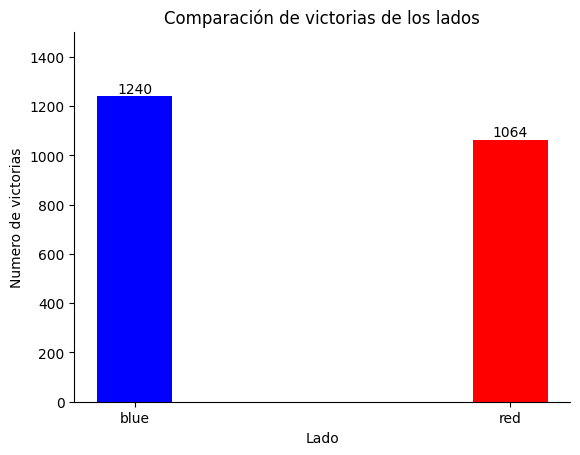

In [54]:
# Histograma para conteo absoluto y donete para porcentaje

fig, ax = plt.subplots()

ax.set_title("Comparación de victorias de los lados")
ax.set_xlabel("Lado")
ax.set_ylabel("Numero de victorias")
ax.set_ylim(0,1500)
bar_withd = 0.20

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

blue = ax.bar("blue", major_leagues["t1_result"][major_leagues["t1_result"] == 1].value_counts(),bar_withd, color = "blue")
red = ax.bar("red", major_leagues["t2_result"][major_leagues["t2_result"] == 1].value_counts(), bar_withd, color = "red")

ax.bar_label(blue)
ax.bar_label(red);

In [55]:
blue_victories = ["blue" for result in major_leagues["t1_result"] if result == 1]
len(blue_victories)

1240

In [56]:
red_victories = ["red" for result in major_leagues["t2_result"] if result == 1]
len(red_victories)

1064

<Axes: ylabel='count'>

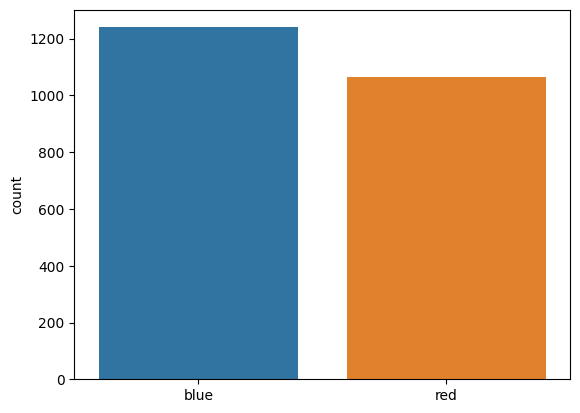

In [57]:
side_victories = blue_victories + red_victories
len(side_victories)
sns.countplot(x = side_victories, hue=side_victories)

In [58]:
plotly_barras = pd.DataFrame(dict(side = ["Blue", "Red"], victories = [len(blue_victories), len(red_victories)]))
plotly_barras

,side,victories
0,Blue,1240
1,Red,1064


In [61]:
fig = px.bar(plotly_barras, x = "side", y = "victories", color = "side", color_discrete_map = {'Blue': '#0925A4', 'Red': "#CF2D0B"})
fig